## https://pbpython.com/monte-carlo.html

### There are two components to running a Monte Carlo simulation:

+ the equation to evaluate
+ the random variables for the input

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns



In [ ]:
sns.set_style('whitegrid')

In [2]:
## create random samples based on a predefined distribution.

## As described above, we know that our historical percent to target performance is centered around a a mean of 100% and standard deviation of 10%.

avg = 1
std_dev = .1
num_reps = 500
num_simulations = 1000

In [3]:
# 生成随机数（符合某种概率分布，这里是正态）
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

In [6]:
# 如果不是正态分布，而是柱状图分布，则使用 choice
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

In [8]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})

df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

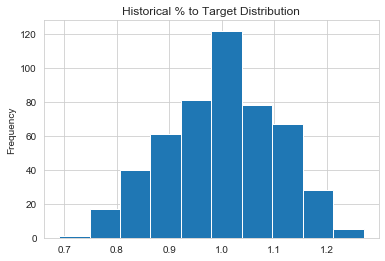

In [16]:
# Simple histogram to confirm distribution looks as expected
df['Pct_To_Target'].plot(kind='hist', title='Historical % to Target Distribution')

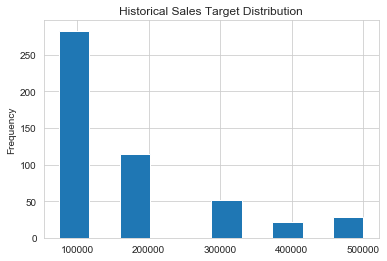

In [17]:
# Look at the sales target distribution
df['Sales_Target'].plot(kind='hist', title='Historical Sales Target Distribution')

In [10]:
def calc_commission_rate(x):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

In [11]:
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

In [13]:
# 记录每次循环的结果，每个元素是一个 数组，有三个元素
# Define a list to keep all the results from each simulation that we want to analyze
all_stats = []

# Loop through many simulations
for i in range(num_simulations):
    # 每次循环，生成随机数，也即：模型的参数
    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})

    # 设置模型的逻辑：根据模型的参数，计算其他值；
    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum().round(0),
                      df['Commission_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])

In [14]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Commission_Amount',
                                                           'Sales_Target'])

In [20]:
results_df.describe().round(0).style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,626,861.0","2,855,204.0","83,623,050.0"
std,"2,726,758.0","103,207.0","2,691,248.0"
min,"74,732,500.0","2,519,732.0","75,075,000.0"
25%,"81,799,312.0","2,782,624.0","81,825,000.0"
50%,"83,572,625.0","2,852,488.0","83,650,000.0"
75%,"85,284,688.0","2,924,539.0","85,400,000.0"
max,"92,739,500.0","3,194,218.0","93,050,000.0"


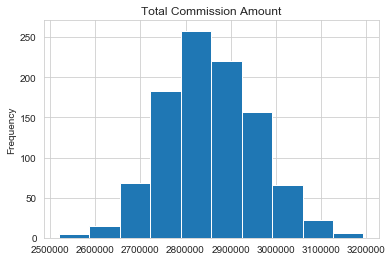

In [21]:
results_df['Commission_Amount'].plot(kind='hist', title="Total Commission Amount")

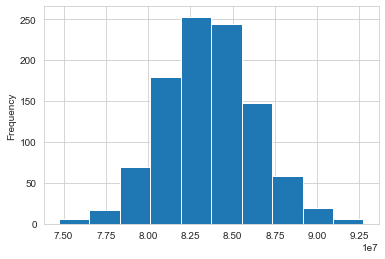

In [22]:
results_df['Sales'].plot(kind='hist')